# 6.5 Machine Learning Part 2

#### The workbook will be structured as follows:
#### 1. Importing libraries and data
#### 2. Cleaning, manipulating and reprocessing
#### 3. The elbow technique
#### 4. Number of clusters
#### 5. K-means algorithm
#### 6. Attaching a new column to the dataframe
#### 7. Creating different visualizations
#### 8. Discussing results
#### 9. Calculating descriptive statistics
#### 10. Results

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Setting path to data
path = r'C:\Users\Anwender\Desktop\ballfifa20'

In [4]:
# Import the cleaned Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean20_fifa_play.csv'), index_col = False)

In [5]:
df.shape

(18038, 35)

In [6]:
df.head()

,Unnamed: 0,ID,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,...,passing,dribbling,defending,physic,power_shot_power,power_jumping,power_long_shots,mentality_aggression,mentality_interceptions,mentality_penalties
0,0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,170,72,Argentina,FC Barcelona,94,...,92.000000,96.00000,39.000000,66.000000,86,68,94,48,40,75
1,1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,187,83,Portugal,Juventus,93,...,82.000000,89.00000,35.000000,78.000000,95,95,93,63,29,85
2,2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,175,68,Brazil,Paris Saint-Germain,92,...,87.000000,95.00000,32.000000,58.000000,80,61,84,51,36,90
3,3,200389,J. Oblak,Jan Oblak,26,188,87,Slovenia,Atlético Madrid,91,...,57.206209,62.52562,51.506795,64.850767,59,78,12,34,19,11
4,4,183277,E. Hazard,Eden Hazard,28,175,74,Belgium,Real Madrid,91,...,86.000000,94.00000,35.000000,66.000000,82,56,80,54,41,88


In [7]:
# Display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [8]:
# Checking the head
df.head()

,Unnamed: 0,ID,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,power_shot_power,power_jumping,power_long_shots,mentality_aggression,mentality_interceptions,mentality_penalties
0,0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Lean,195800000.0,RW,01/07/2004,2021.0,87.000000,92.0,92.000000,96.00000,39.000000,66.000000,86,68,94,48,40,75
1,1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,Normal,96500000.0,LW,10/07/2018,2022.0,90.000000,93.0,82.000000,89.00000,35.000000,78.000000,95,95,93,63,29,85
2,2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,Lean,195200000.0,CAM,03/08/2017,2022.0,91.000000,85.0,87.000000,95.00000,32.000000,58.000000,80,61,84,51,36,90
3,3,200389,J. Oblak,Jan Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,16/07/2014,2023.0,67.702219,52.0,57.206209,62.52562,51.506795,64.850767,59,78,12,34,19,11
4,4,183277,E. Hazard,Eden Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,Normal,184500000.0,LW,01/07/2019,2024.0,91.000000,83.0,86.000000,94.00000,35.000000,66.000000,82,56,80,54,41,88


# 2. cleaning, manipulation and reprocessing

In [9]:
df.columns

Index(['Unnamed: 0', 'ID', 'short_name', 'long_name', 'age', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'release_clause_eur',
       'team_position', 'joined', 'contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'power_shot_power',
       'power_jumping', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_penalties'],
      dtype='object')

In [10]:
# Dropping variables not needed for the clutering
df_fifa_num = df.drop(['Unnamed: 0', 'preferred_foot', 'weak_foot', 'body_type', 'team_position', 'short_name', 'long_name', 'work_rate', 'nationality', 'club', 'ID', 'team_position', 'joined'], axis=1, inplace=True)

In [11]:
df.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,skill_moves,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,power_shot_power,power_jumping,power_long_shots,mentality_aggression,mentality_interceptions,mentality_penalties
0,32,170,72,94,94,95500000,565000,5,4,195800000.0,2021.0,87.000000,92.0,92.000000,96.00000,39.000000,66.000000,86,68,94,48,40,75
1,34,187,83,93,93,58500000,405000,5,5,96500000.0,2022.0,90.000000,93.0,82.000000,89.00000,35.000000,78.000000,95,95,93,63,29,85
2,27,175,68,92,92,105500000,290000,5,5,195200000.0,2022.0,91.000000,85.0,87.000000,95.00000,32.000000,58.000000,80,61,84,51,36,90
3,26,188,87,91,93,77500000,125000,3,1,164700000.0,2023.0,67.702219,52.0,57.206209,62.52562,51.506795,64.850767,59,78,12,34,19,11
4,28,175,74,91,91,90000000,470000,4,4,184500000.0,2024.0,91.000000,83.0,86.000000,94.00000,35.000000,66.000000,82,56,80,54,41,88


# Droping value_eur and replace it with wage_eur, since the variable “age” had values between 0 and 42 while “value_eur” had values between 1 million and 100 million, the k-means algorithm would give more weight to “value_eur,” leading to data bias, so i will remove it to avoid this bias.

In [12]:
df.drop(['value_eur'], axis=1, inplace=True)

In [13]:
df.drop(['release_clause_eur'], axis=1, inplace=True)

In [14]:
df.head()

,age,height_cm,weight_kg,overall,potential,wage_eur,international_reputation,skill_moves,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,power_shot_power,power_jumping,power_long_shots,mentality_aggression,mentality_interceptions,mentality_penalties
0,32,170,72,94,94,565000,5,4,2021.0,87.000000,92.0,92.000000,96.00000,39.000000,66.000000,86,68,94,48,40,75
1,34,187,83,93,93,405000,5,5,2022.0,90.000000,93.0,82.000000,89.00000,35.000000,78.000000,95,95,93,63,29,85
2,27,175,68,92,92,290000,5,5,2022.0,91.000000,85.0,87.000000,95.00000,32.000000,58.000000,80,61,84,51,36,90
3,26,188,87,91,93,125000,3,1,2023.0,67.702219,52.0,57.206209,62.52562,51.506795,64.850767,59,78,12,34,19,11
4,28,175,74,91,91,470000,4,4,2024.0,91.000000,83.0,86.000000,94.00000,35.000000,66.000000,82,56,80,54,41,88


# 3. The elbow technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-8310704199440.029,
 -3585354700975.8633,
 -1766122480484.03,
 -1099694252974.8967,
 -729804780083.3934,
 -524700500013.61096,
 -389451051169.8537,
 -295982573253.2571,
 -240065513017.8437]

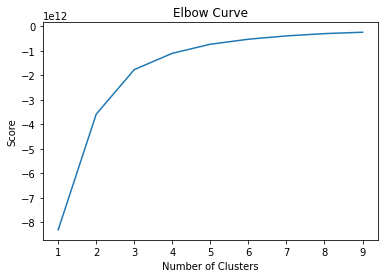

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4. Number of clusters

### In this example, there's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 5. K-means algorithm

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1)

In [21]:
# Fit the k-means object to the data.

kmeans.fit(X_scaled)

C:\Users\Anwender\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

# 6. Attaching a new column to the dataframe

In [22]:
df['clusters'] = kmeans.fit_predict(X_scaled)

C:\Users\Anwender\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [23]:
df.head()

,age,height_cm,weight_kg,overall,potential,wage_eur,international_reputation,skill_moves,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,power_shot_power,power_jumping,power_long_shots,mentality_aggression,mentality_interceptions,mentality_penalties,clusters
0,32,170,72,94,94,565000,5,4,2021.0,87.000000,92.0,92.000000,96.00000,39.000000,66.000000,86,68,94,48,40,75,0
1,34,187,83,93,93,405000,5,5,2022.0,90.000000,93.0,82.000000,89.00000,35.000000,78.000000,95,95,93,63,29,85,0
2,27,175,68,92,92,290000,5,5,2022.0,91.000000,85.0,87.000000,95.00000,32.000000,58.000000,80,61,84,51,36,90,0
3,26,188,87,91,93,125000,3,1,2023.0,67.702219,52.0,57.206209,62.52562,51.506795,64.850767,59,78,12,34,19,11,3
4,28,175,74,91,91,470000,4,4,2024.0,91.000000,83.0,86.000000,94.00000,35.000000,66.000000,82,56,80,54,41,88,0


In [24]:
df['clusters'].value_counts()

2    5574
1    5322
0    5148
3    1994
Name: clusters, dtype: int64

# 7. Creating different visualizations

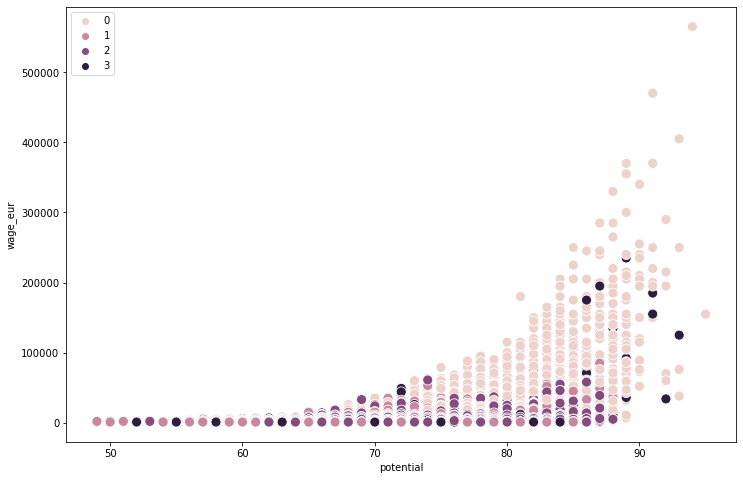

In [27]:
# Plot the clusters for the "potential" and "wage_eur" variables.

plotbar = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['potential'], y=df['wage_eur'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('potential') # Label x-axis.
plt.ylabel('wage_eur') # Label y-axis.
plt.show()

In [28]:
plotbar.figure.savefig(os.path.join(path, '02 Data','Prepared Data', 'cluster.png'))

# 8. Discussing results

### The first cluster from the top in purple color, (coded as “2” in the legend), shows that player with high potential above 80  tends to earn more wages. It gathers the data points with very high potential and relatively high wages (with the exclusion of some extreme values at the top of the wage range). The second cluster, in pink (coded as “1” in the legend), includes points with highest potential and lower wages than the first cluster. The third cluster in dark purple colour has high potential but higher on average than the fourth cluster. The fourth cluster, in light pink (coded as “0” in the legend), contains the points from low potential to the high potential and the lowest wages. There are hardly any potential above 89. These could be players with high potential not performing well as expected.

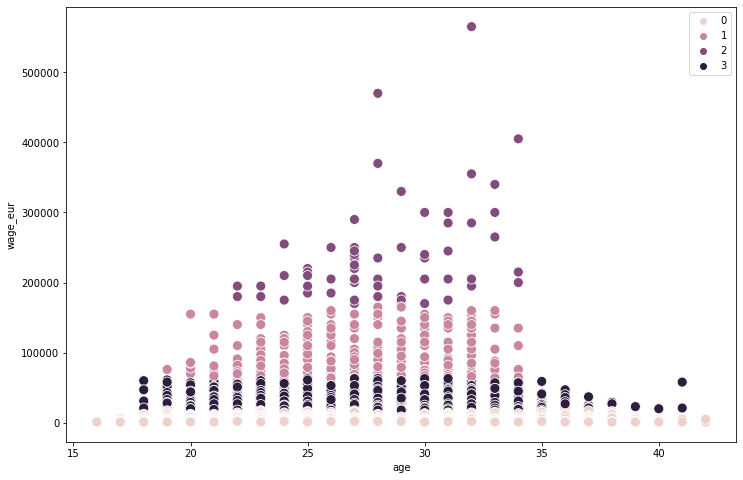

In [29]:
# Plot the clusters for the "age" and "wage_eur" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['age'], y=df['wage_eur'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('age') # Label x-axis.
plt.ylabel('wage_eur') # Label y-axis.
plt.show()

### The first cluster, in purple (coded as “2” in the legend), It gathers the data points with middle age players and relatively high wages (with the exclusion of some extreme values at the top of the wage range). we can see this players from age 22 to 34. The second cluster, in light pink (coded as “1” in the legend), also includes points with middle age players and lower wages than the first cluster, there are hardly players above 34 years of age. The third cluster in dark purple colour has older players and lower wage but higher on average than the fourth cluster. The fourth cluster, in light pink (coded as “0” in the legend), contains the points with ages above 40 and the lowest wages.

# 9. Calcuating descriptive statistics

In [35]:
# naming the clusters
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [36]:
df.groupby('cluster').agg({'potential':['mean', 'median'], 
                         'age':['mean', 'median'], 
                         'international_reputation':['mean', 'median'],
                          'wage_eur':['mean', 'median']})

potential               age        international_reputation  \
                  mean median       mean median                     mean   
cluster                                                                    
dark purple  77.866949   78.0  27.174894   27.0                 1.409027   
light pink   70.375233   70.0  24.923627   24.0                 1.028656   
pink         83.602524   84.0  26.845426   27.0                 2.223975   
purple       88.446154   89.0  28.200000   28.0                 3.384615   

                         wage_eur            
            median           mean    median  
cluster                                      
dark purple    1.0   31041.372826   27000.0  
light pink     1.0    3936.763475    2000.0  
pink           2.0   95173.501577   86000.0  
purple         3.0  238846.153846  210000.0

### The purple cluster has the best stats in the above categories, this tells us that more players within the middle-age has more wages and corresponding to their international reputation.

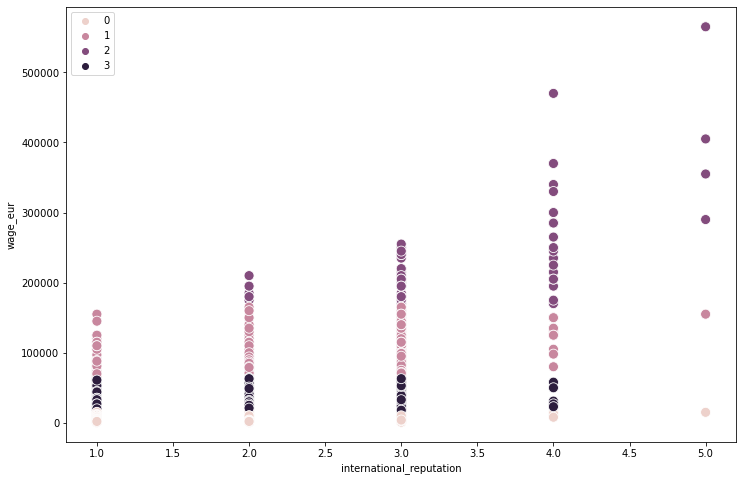

In [33]:
# Plot the clusters for the "international_reputation" and "wage_eur" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['international_reputation'], y=df['wage_eur'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('international_reputation') # Label x-axis.
plt.ylabel('wage_eur') # Label y-axis.
plt.show()

###  One can see that there are few players over 4.0 rating and low wage, in pink cluster of points (coded as “1” in the legend), while in the purple cluster (coded as “2” in the legend), which shows more players that has more international reputation have more wages than any other clusters.

# 10. Results

### These results could be useful in the future steps of the analytics pipeline by telling us what cateria a player need to have, which categories they fit into, and trying other variables like weight, pace, height, etc vs. wages will give us more insight about this variables. 

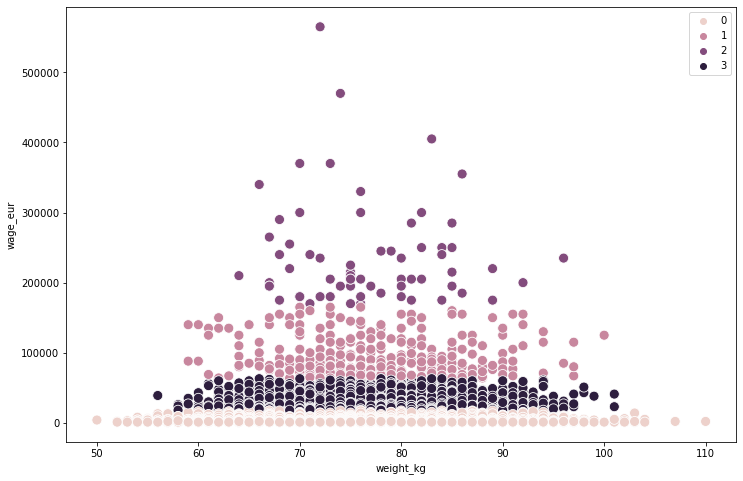

In [30]:
# Plot the clusters for the "weight_kg" and "wage_eur" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['weight_kg'], y=df['wage_eur'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('weight_kg') # Label x-axis.
plt.ylabel('wage_eur') # Label y-axis.
plt.show()

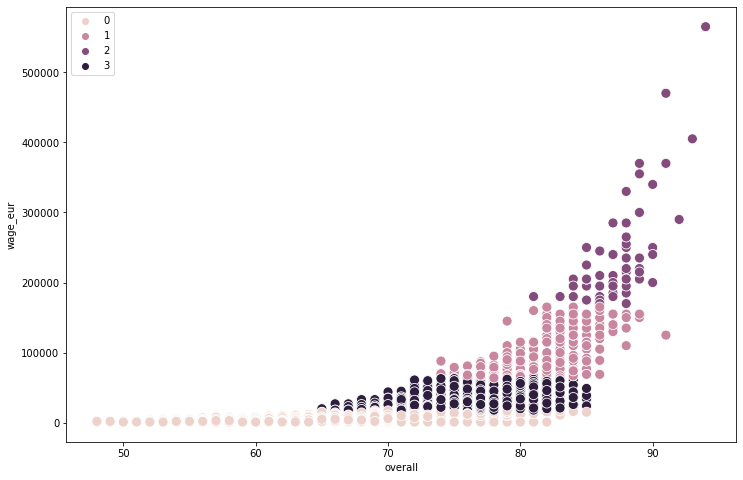

In [31]:
# Plot the clusters for the "overall" and "wage_eur" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['overall'], y=df['wage_eur'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('overall') # Label x-axis.
plt.ylabel('wage_eur') # Label y-axis.
plt.show()

### These shows overating above 80 have a very higher wage compared to those from 0 to 70, this means that players with high wage and level of overall rating corresponds to the players with higher potentials.